# Churn problem 

A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

%matplotlib inline

Read the file Churn_Modelling.csv.  
Show the first few records.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


What are the dimensions of the datasets?

In [3]:
df.shape

(10000, 14)

Is this a skewed dataset?

In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Drop the columns RowNumber, CustomerId and Surname

In [5]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

What are the different values for Geography?

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Use one-hot encoding to replace Gender and Geography.

In [7]:
df = pd.get_dummies(df,columns=['Geography','Gender'],prefix=['Geography','Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Make sure you understand this function. We will use is later on to evaluate the ANN.

In [17]:
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

What is X and what is y?

In [8]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

What is X_train, y_train, X_test, y_test?

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

What is X_train, y_train, X_val, y_val?

In [10]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15,random_state=42)

What are the dimensions of X_train, X_val, X_test, y_train, y_val, y_test?

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(7225, 13)
(1275, 13)
(1500, 13)
(7225,)
(1275,)
(1500,)


Standardize the data before providing it as training data.  
You should only use the training data to fit the scaler transformation
and use the same fitted object to transform the validation and test input
data.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

* First create a small ANN model.  
* Add BatchNormalization
* Add Dropout
* Evaluate the results after each fine tuning.


In [13]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Dense(128,activation="relu",input_dim = X_train_scaled.shape[1]))

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.BatchNormalization())


model.add(keras.layers.Dense(1,activation='sigmoid'))


In [14]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [15]:
history = model.fit(X_train_scaled,y_train,epochs=30,batch_size=64,validation_data=(X_val_scaled,y_val))

Epoch 1/30
113/113 [==============================] - 1s 4ms/step - loss: 0.6602 - accuracy: 0.6585 - val_loss: 0.4909 - val_accuracy: 0.7875
Epoch 2/30
113/113 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7642 - val_loss: 0.4379 - val_accuracy: 0.8016
Epoch 3/30
113/113 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7957 - val_loss: 0.4037 - val_accuracy: 0.8314
Epoch 4/30
113/113 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8107 - val_loss: 0.3809 - val_accuracy: 0.8494
Epoch 5/30
113/113 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8149 - val_loss: 0.3681 - val_accuracy: 0.8596
Epoch 6/30
113/113 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8249 - val_loss: 0.3608 - val_accuracy: 0.8580
Epoch 7/30
113/113 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8246 - val_loss: 0.3602 - val_accuracy: 0.8573
Epoch 

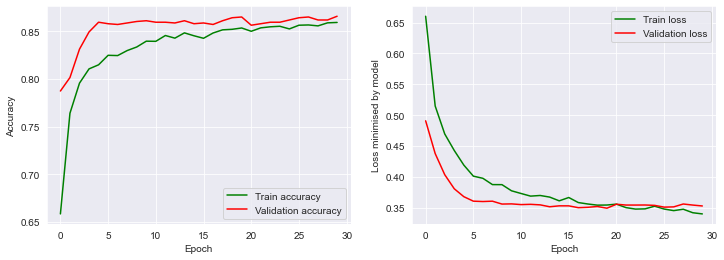

In [18]:
plot_history(history)